# OCMP5318 - Machine Learning and Data Mining: Assignment 1
**Deadline**: The last day of Week 4, at 11:59PM

Full Name: Ayra Islam

Student ID:

## 1. Objective

In this assignment, your task is to apply and evaluate machine learning techniques for a practical application: **Street View House Numbers recognition**.
You are required to develop **four machine learning algorithms** for the classification task tailored with the **SVHN** dataset. Assessment will be based on your models' performance as well as your exhibited understanding of the techniques applied.

### *Important Notes*:
1)	Please refer to lecture notes and lab materials for different machine learning methods and evaluation methods.

2)	Please proceed your own way if we do not specify it in the assignment details.

3)	You can use packages or code from the tutorials. If you use any other package or code, please put the reference at the bottom of the code. Otherwise, it will be considered as plagiarism and the relevant section will not be marked.


## 2. Dataset

### 2.1 Description

Dataset **Street View House Numbers (SVHN)**:
- A real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data preprocessing and formatting. It can be seen as similar in flavor to MNIST (e.g., the images are of small cropped digits), but incorporates an order of magnitude more labeled data (over 600,000 digit images) and comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. The dataset comes in format of MNIST-like 32-by-32 images centered around a single character (many of the images do contain some distractors at the sides).

- 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. 73257 digits for training, 26032 digits for testing.

The complete dataset can be found at the UCI Machine Learning Repository: [The Street View House Numbers (SVHN) Dataset](http://ufldl.stanford.edu/housenumbers/)

### 2.2 Dataset Structure

For this assignment, the dataset is neatly organized within the `data` folder, as outlined below:

The `data_asg1` folder including 2 separate files:

- `train_32x32.mat` and `test_32x32.mat`: These files, found within their corresponding directories, comprise the feature vectors, labels for both the training and test sets.

### 2.3 Load and analyze the data

In [ ]:
# Set directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/My Drive/data_asg1"

In [ ]:
# Import library
import os
import numpy as np
import scipy.io

In [ ]:
train_mat = scipy.io.loadmat('/content/drive/MyDrive/data_asg1/train_32x32.mat')
test_mat = scipy.io.loadmat('/content/drive/MyDrive/data_asg1/test_32x32.mat')

In [ ]:
train_features, train_labels = train_mat['X'],train_mat['y']
test_features, test_labels = test_mat['X'],test_mat['y']

In [ ]:
print(train_features.shape, train_labels.shape)

(32, 32, 3, 73257) (73257, 1)


In [ ]:
print(test_features.shape, test_labels.shape)

(32, 32, 3, 26032) (26032, 1)


There are 73257 digits for training, which are images with the shape of **(32, 32, 3)**.
You may need to reshape the training feature to (73257, 32, 32, 3) where 73257 is training samples. 32,32 is the size of the image and we have 3 channels of RGB.

In [ ]:
train_features = train_features.transpose((3, 0, 1, 2))
test_features = test_features.transpose((3, 0, 1, 2))

Below is an example of one data sample which is the image of House Numbers. We only consider the number in the central of the image, and it is labeled as 1.

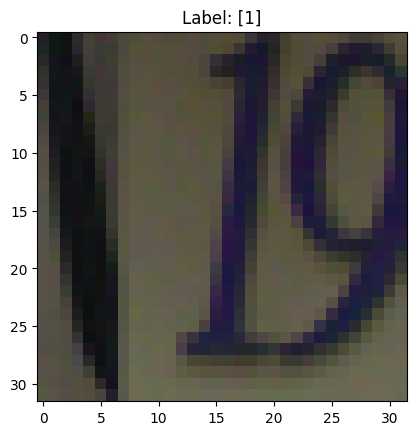

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(train_features[0], interpolation='nearest')
plt.title(f'Label: {train_labels[0]}')
plt.show()

## 3. Submission Details

As part of the submission requirements, you are required to provide an `.ipynb` file containing your code and a `.pdf` document for the report.

1.	**Code (60%)**: `.ipynb` file that can be successfully run on Colab and contain all sections of the given template. The file name should be your SID. For example: '123123123.ipynb'. Students auditing the class (not registered) are NOT allowed to upload a submission.
**IMPORTANT**: Run all cells, and do not clear out the outputs, before submitting. You will only get credit for code that has been run.

2. **Report (40%)**: `.pdf` file with a maximum of 10 pages (appendix and reference excluded). The file name should be your SID. For example: '123123123.pdf'

## 4. Code


### Your code should clearly demonstrate the following elements:

1. **Data Pre-processing Techniques**: Implement and provide a clear explanation of at least one data pre-processing technique utilized on the dataset.

2. **Machine Learning Algorithms**: Include detailed implementations of four machine learning algorithms. Select from the following list:

        a. Nearest Neighbor
        b. Logistic Regression
        c. Naïve Bayes
        d. SVM
        e. Decision Tree
        f. Bagging
        g. Boosting
        h. Random forest

   Make sure to justify your choice of algorithms, and your code should clearly convey your comprehension of these algorithms' operations. These algorithms can be implemented using `sklearn` or built from scratch.

3. **Hyperparameter Tuning**: Illustrate the process of fine-tuning hyperparameters for each selected algorithm. This includes a clear explanation of your choice of hyperparameters and any employed techniques for tuning them.

4. **Evaluation Metrics**: Evaluate each method using relevant metrics such as precision, recall, F1-score, and accuracy. Use charts or tables to intuitively visualize the results.

5. **Algorithm Comparison**: Compare the results from four implemented algorithms using charts or tables.

6. **Coding Environment**: Please specify the details of the hardware and software environments used for performance evaluation in both code and report. This information should encompass your operating system, Python version, and any major libraries or frameworks utilized.

Note that your final code submission should be well-organized, readable, and properly commented.

### 4.0. Setup

Import and install all the necessaries libraries

In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Import libraries used for data augmentation
import albumentations as A
import cv2
import joblib
import pickle
import time

# Import pre-processing steps
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Import models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Import model training aids
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight, resample

# Import evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, make_scorer
from sklearn.metrics import classification_report,confusion_matrix

np.random.seed(42)

### 4.1. Data Pre-processing

You will need to have at least one pre-process techique before you can apply the classification algorithms. Pre-process techique can be **Normalisation**, **PCA**, etc.

#### Fix label

Currently pictures with labels 10 have 0 in the middle
We will update their labels to be 0 because a 0 in the middle does not always guarantee it will be a 10.

In [ ]:
train_labels[train_labels == 10] = 0
test_labels[test_labels == 10] = 0

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Grey Scale Conversion

In [ ]:
def rgb_to_grayscale(image):
    """
    Convert an RGB image to grayscale.

    Parameters:
    - image (numpy array): Input RGB image.

    Returns:
    - numpy array: Grayscale image.
    """
    if image.dtype != np.uint8:
        image = (image * 255).astype(np.uint8)
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


In [ ]:
# Apply on training data
train_features_grey = []
for image in range(train_features.shape[0]):
  grey_image = rgb_to_grayscale(train_features[image])
  train_features_grey.append(grey_image)

train_features_grey = np.array(train_features_grey)

In [ ]:
# Apply on test data too
test_features_grey = []
for image in range(test_features.shape[0]):
  grey_image = rgb_to_grayscale(test_features[image])
  test_features_grey.append(grey_image)

test_features_grey = np.array(test_features_grey)

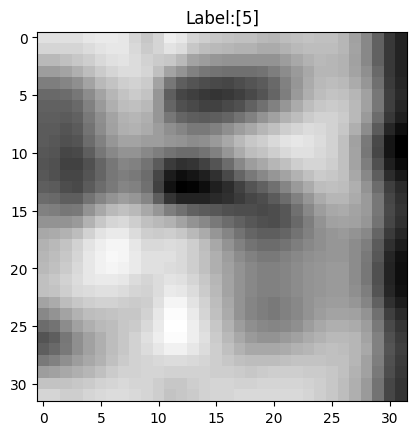

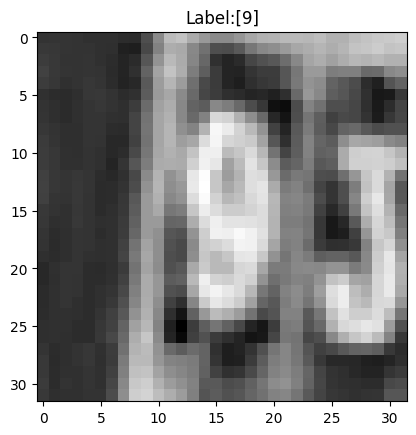

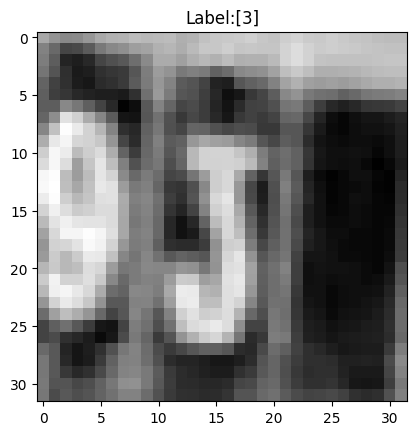

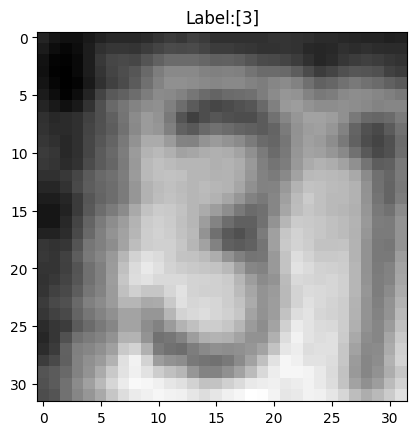

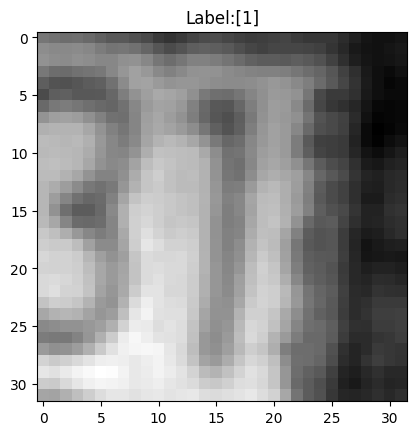

In [ ]:
# Check how images look like
for i in (range(5,10)):
    plt.imshow(train_features_grey[i],cmap = 'gray')
    plt.title(f"Label:{train_labels[i]}")
    plt.show()

#### Normalise Data

In [ ]:
train_features = train_features_grey/255
test_features = test_features_grey/255

#### Handle Imbalanced Dataset

Check distribution for training data

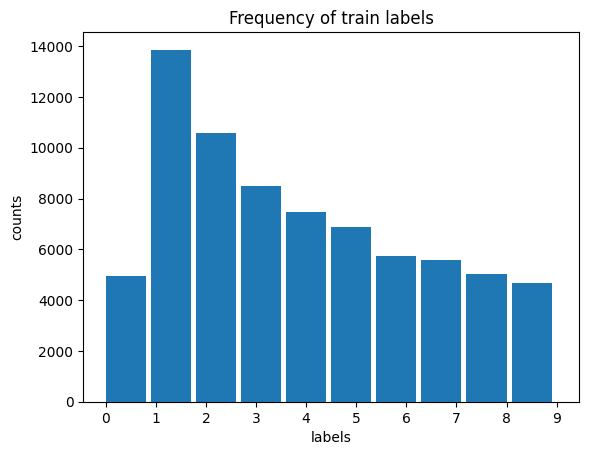

In [ ]:
plt.hist(train_labels, width= 0.8)
plt.xlabel('labels')
plt.ylabel('counts')
plt.title('Frequency of train labels')
plt.xticks(np.unique(train_labels))

plt.show()


In [ ]:
# Get count distribution for training data
class_values, class_counts = np.unique(train_labels, return_counts=True)
print(class_counts)

[ 4948 13861 10585  8497  7458  6882  5727  5595  5045  4659]


In [ ]:
def calculate_global_imbalance_ratio(class_counts):
    N_max = np.max(class_counts)
    IR_per_class = N_max / class_counts
    IR_mean = np.mean(IR_per_class)
    return IR_mean, IR_per_class

# Compute global imbalance ratio
IR_mean, IR_per_class = calculate_global_imbalance_ratio(class_counts)

print(f"Imbalance Ratio per Class: {IR_per_class}")
print(f"Global Imbalance Ratio (Mean IR): {IR_mean}")

Imbalance Ratio per Class: [2.80133387 1.         1.30949457 1.63128163 1.85854116 2.01409474
 2.42028986 2.47739053 2.74747275 2.97510195]
Global Imbalance Ratio (Mean IR): 2.123500105344864


There is moderate imbalance in the dataset since global imbalance ratio is > 1. We will employ oversampling technique using data augmentation and downsampling majority class to balance numbers.

Step 1: We will upsample minority classes 0, 5-9 by generating new images based on original images. Only the training set will be augmented to avoid data leakage into test data.

In [ ]:
# Define the augmentation transformation
# Transformations include horizontal and vertical flipping,
# Rotations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.7),
    A.GaussianBlur(blur_limit=(3, 5), p=0.3),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.6)
])

Example below

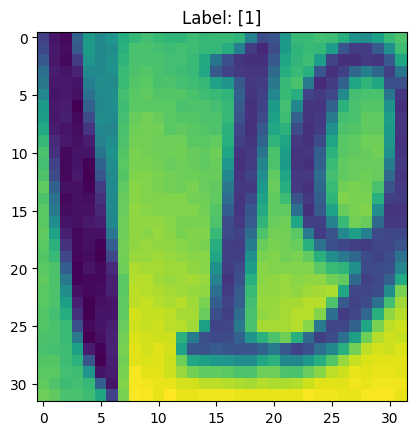

In [ ]:
plt.imshow(train_features[0], interpolation='nearest')
plt.title(f'Label: {train_labels[0]}')
plt.show()

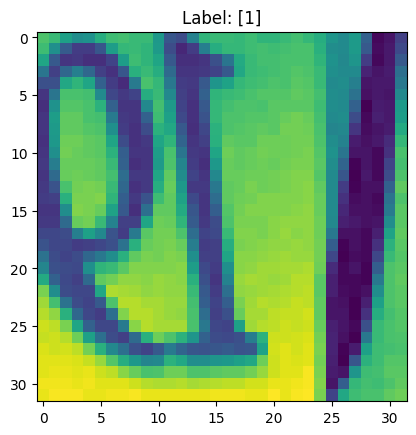

In [ ]:
augmented_image = transform(image=train_features[0])['image']
plt.imshow(augmented_image, interpolation='nearest')
plt.title(f'Label: {train_labels[0]}')
plt.show()

In [ ]:
# Note that target n_samples were set to 86000 as increasing the number of samples
# lead to longer than expected computational time when training the model.
def oversample_minority_class(X, y, target_n_samples=86000):
    """
    Partially balances the dataset by adding extra augmented samples
    while keeping the total dataset size within target_n_samples.
    """
    label_values, label_counts = np.unique(y, return_counts=True)
    total_current_samples = np.sum(label_counts)
    extra_needed = target_n_samples - total_current_samples  # Remaining space for augmentation

    if extra_needed <= 0:
        print("Dataset is already large enough, skipping oversampling.")
        return np.array([]), np.array([])

    # Determine how much each class needs to be upsampled
    mean_count = np.mean(label_counts)
    # Store all the classes with counts less than the mean score
    # in a dictionary
    underrepresented_classes = {cls: count for cls, count in zip(label_values, label_counts) if count < mean_count}

    # Distribute extra images proportionally among minority classes
    total_underrepresented = sum(underrepresented_classes.values())
    # Distributes the additional counts across all the minority classes
    # so that we don't exceed to quota of 86,000 total images
    # For example if digit 0 had 14, and total count of underrepresented classes was 40
    # We would take the proportion of the underrepresented class i.e. 14/40 = 0.35
    # And multiply it by the additional images we want to generate in total.
    class_augmentation_quota = {cls: int((count / total_underrepresented) * extra_needed)
                                for cls, count in underrepresented_classes.items()}

    augmented_images = []
    augmented_labels = []

    # For each digit class
    for digit_class, quota in class_augmentation_quota.items():
        # We find where the digits are found
        indices = np.where(y == digit_class)[0]
        images = X[indices]
        # Generate augmented images for each digit
        # based of the quote specified for the digit.
        for _ in range(quota):
            idx = np.random.randint(0, len(images))
            augmented_image = transform(image=images[idx])['image']
            augmented_images.append(augmented_image)
            augmented_labels.append(digit_class)

    return np.array(augmented_images), np.array(augmented_labels)

# Apply function on train set only
augmented_train_features, augmented_train_labels = oversample_minority_class(train_features, train_labels, target_n_samples=85000)

# Stack augmented data
train_features_upsampled = np.vstack((train_features, augmented_train_features))
train_labels_upsampled = np.vstack((train_labels, augmented_train_labels.reshape(-1, 1)))

print("Final training data shape:", train_features_upsampled.shape)
print("Final training labels shape:", train_labels_upsampled.shape)

ValueError: not enough values to unpack (expected 2, got 1)

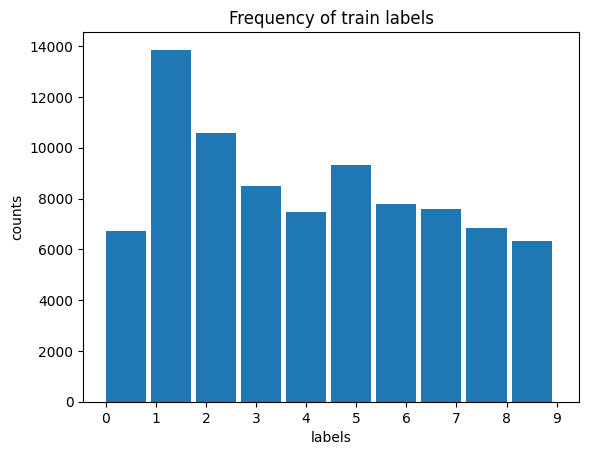

In [ ]:
plt.hist(train_labels_upsampled, width= 0.8)
plt.xlabel('labels')
plt.ylabel('counts')
plt.title('Frequency of train labels')
plt.xticks(np.unique(train_labels))

plt.show()

In [ ]:
# Get count distribution for training data
class_values_upsampled, class_counts_upsampled = np.unique(train_labels_upsampled, return_counts=True)
print(class_counts)

# Compute global imbalance ratio >> reduced to 1.71
IR_mean, IR_per_class = calculate_global_imbalance_ratio(class_counts_upsampled)

print(f"Imbalance Ratio per Class: {IR_per_class}")
print(f"Global Imbalance Ratio (Mean IR): {IR_mean}")

[ 6716 13861 10585  8497  7458  9341  7773  7594  6848  6324]
Imbalance Ratio per Class: [2.06387731 1.         1.30949457 1.63128163 1.85854116 1.48388823
 1.78322398 1.82525678 2.02409463 2.19180898]
Global Imbalance Ratio (Mean IR): 1.7171467272971708


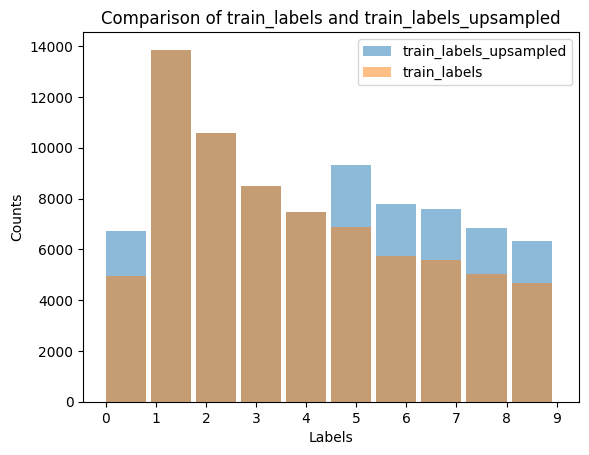

In [ ]:
# Plot for train_labels_upsampled
plt.hist(train_labels_upsampled, width=0.8, alpha=0.5, label='train_labels_upsampled')

# Plot for train_labels
plt.hist(train_labels, width=0.8, alpha=0.5, label='train_labels')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Comparison of train_labels and train_labels_upsampled')

# Add legend
plt.legend()

# Set x-ticks to show all unique labels
plt.xticks(np.unique(train_labels_upsampled))

# Show the plot
plt.show()

Although, there is still some imbalance, most modelling techniques are robust to slighlty imbalanced datasets. We will also include class weights to ensure imbalanceness is considered whilst training.

#### Flatten and standardise

Flatten

In [ ]:
train_features = train_features_upsampled.reshape(train_features_upsampled.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# Shape after flattening
print(train_features.shape)
print(test_features.shape)

(84997, 1024)
(26032, 1024)


Standardise

In [ ]:
standardise = StandardScaler()
train_features = standardise.fit_transform(train_features)
test_features = standardise.transform(test_features)

#### PCA decomposition with 95% variance

In [ ]:
pca = PCA()
pca.fit(train_features)

# Calculate the cumulative sum of the explained variance ratio
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% variance
d = np.argmax(cumsum >= 0.95) + 1  # Adding 1 because np.argmax returns 0-based index

print(f"Number of components explaining at least 95% variance: {d}") # 48 components are needed


Number of components explaining at least 95% variance: 48


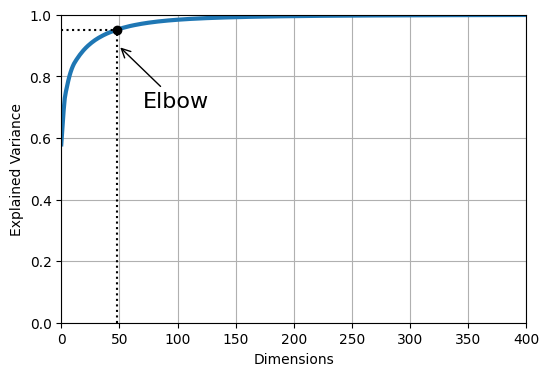

In [ ]:
# Plot explained variance vs number of dimensions for training data
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(49, 0.90), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
# Get PCA reduced data for training data
pca = PCA(n_components = 48)
train_features = pca.fit_transform(train_features)

In [ ]:
print(train_features.shape)

(84997, 48)


In [ ]:
# Apply same transformation to test data
test_features = pca.fit_transform(test_features)

In [ ]:
# Prior to pickling the files I will check if the dimensions are as expected
print(train_features.shape)
print(train_labels_upsampled.shape)
print(test_features.shape)
print(test_labels.shape)

(84997, 48)
(84997, 1)
(26032, 48)
(26032, 1)


In [ ]:
# Save results in an file so code above does not need to be re-run again
# file = open('/content/drive/My Drive/data_asg1/train_features_transformed', 'wb')
# pickle.dump(train_features, file)
# file = open('/content/drive/My Drive/data_asg1/test_features_transformed', 'wb')
# pickle.dump(test_features, file)
# file = open('/content/drive/My Drive/data_asg1/train_labels_transformed', 'wb')
# pickle.dump(train_labels_upsampled, file)
# file = open('/content/drive/My Drive/data_asg1/test_labels_transformed', 'wb')
# pickle.dump(test_labels, file)
# file.close()

### 4.2 Testing Hyperparameters and Evaluating Models

In [ ]:
# Read dataset - included to avoid running preprocessing steps above
# train_features = pd.read_pickle(r'/content/drive/My Drive/data_asg1/train_features_transformed')
# train_labels = pd.read_pickle(r'/content/drive/My Drive/data_asg1/train_labels_transformed')
# test_features = pd.read_pickle(r'/content/drive/My Drive/data_asg1/test_features_transformed')
# test_labels = pd.read_pickle(r'/content/drive/My Drive/data_asg1/test_labels_transformed')

In [ ]:
# Check dimensions are ok after reading in data
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(84997, 48)
(84997, 1)
(26032, 48)
(26032, 1)


Here we will calculate class weights and main testing score - f1. Class Weights will place less emphasis on majority classes whilst the f1 score is used instead of accuracy, since accuracy can be easily influenced by imbalanced data.

In [ ]:
# Prior to training we will establish the metrics we establish the class weight and main metric used for testing

# Class Weighting
class_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=train_labels
)
print(class_weights)

# Define the scoring metrics
f1_weighted = make_scorer(f1_score, average='weighted')

[0.61320973 1.34403858 0.8029948  ... 1.34403858 1.34403858 1.34403858]


#### 4.2a. Random Forest

The algorithm can be implemented using `sklearn` or built from scratch.

##### Base model

First we will see how well the base model performs.

In [ ]:
# Initialise model
rf = RandomForestClassifier(random_state=42)

First we will see how well the default model performs

In [ ]:
base_rnd_clf = RandomForestClassifier()
base_rnd_clf.fit(train_features, train_labels)
predicted_labels = base_rnd_clf.predict(test_features)
print(metrics.classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.09      0.05      0.07      1744
           1       0.28      0.46      0.35      5099
           2       0.22      0.27      0.24      4149
           3       0.11      0.09      0.10      2882
           4       0.23      0.18      0.20      2523
           5       0.10      0.14      0.12      2384
           6       0.07      0.05      0.05      1977
           7       0.06      0.04      0.05      2019
           8       0.07      0.03      0.05      1660
           9       0.07      0.03      0.04      1595

    accuracy                           0.19     26032
   macro avg       0.13      0.13      0.13     26032
weighted avg       0.16      0.19      0.17     26032



##### Hyperparameter testing

1. Test for Number of Estimators

In [ ]:
# Define parameter grid
# n_estimators refers to the number of trees in the model
param_grid = {
    'n_estimators': [100,200,300]
}


# Perform GridSearch
grid_search = GridSearchCV(rf,
                          param_grid,
                          cv=5,
                          scoring=f1_weighted,
                          return_train_score=True,
                          n_jobs=-1,
                          verbose=2)

grid_search.fit(train_features, train_labels)

# Results
print("Training set score: {:.2f}".format(grid_search.score(train_features,
                                                            train_labels)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

# 300 estimators was the best score

Fitting 3 folds for each of 3 candidates, totalling 9 fits


2. Test For Max Depth

In [ ]:
# Define parameter grid
param_grid = {
    'max_depth': [10,20,30]
}

# Perform GridSearch
grid_search = GridSearchCV(rf,
                          param_grid,
                          cv=5,
                          scoring=f1_weighted,
                          return_train_score=True,
                          n_jobs=-1,
                          verbose=2)

ggrid_search.fit(train_features, train_labels)

# Results
print("Training set score: {:.2f}".format(grid_search.score(train_features,
                                                            train_labels)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

# 30 was best for max depth

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

3. Test for Min Samples Split

In [ ]:
# Define parameter grid
param_grid = {
    'max_samples':[0.7], #Reduce amount for training
    'oob_score':[True],
    'min_samples_split': [10,20,30]
}

# Perform GridSearch
grid_search = GridSearchCV(rf,
                      param_grid,
                      cv=5,
                      scoring= f1_weighted,
                      return_train_score=True,
                      n_jobs=-1,
                      verbose=2)

grid_search.fit(train_features, train_labels)

# Results
print("Training set score: {:.2f}".format(grid_search.score(train_features,
                                                            train_labels)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

# best min_sample_split was 10

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training set score: 0.99
Best parameters: {'max_samples': 0.7, 'min_samples_split': 10, 'oob_score': True}
Best cross-validation score: 0.60
Best estimator:
RandomForestClassifier(max_samples=0.7, min_samples_split=10, oob_score=True,
                       random_state=42)


4. Test for Min Sample Leaf

In [ ]:
# Tune min sample leaf for Random Forest
# Define parameter grid

param_grid = {
    'max_samples':[0.7], #Reduce amount for training
    'oob_score':[True],
    'min_samples_leaf': [1,3,5,7]
}

# Perform GridSearch
grid_search = GridSearchCV(rf,
                      param_grid,
                      cv=5,
                      scoring= f1_weighted,
                      return_train_score=True,
                      n_jobs=-1,
                      verbose=2)

grid_search.fit(train_features, train_labels)

# Results
print("Training set score: {:.2f}".format(grid_search.score(train_features,
                                                            train_labels)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

# Best Min Sample Leaf is 3

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training set score: 1.00
Best parameters: {'max_samples': 0.7, 'min_samples_leaf': 3, 'oob_score': True}
Best cross-validation score: 0.60
Best estimator:
RandomForestClassifier(max_samples=0.7, min_samples_leaf=3, oob_score=True,
                       random_state=42)


5. Test for max features

In [ ]:
param_grid = {
    'max_samples':[0.7], #Reduce amount for training
    'oob_score':[True],
    'max_features': ['sqrt','log',None]
}

# Perform GridSearch
grid_search = GridSearchCV(rf,
                      param_grid,
                      cv=5,
                      scoring= f1_weighted,
                      return_train_score=True,
                      n_jobs=-1,
                      verbose=2)

grid_search.fit(train_features, train_labels)

# Results
print("Training set score: {:.2f}".format(grid_search.score(train_features,
                                                            train_labels)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

# Best max_features is sqrt

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_pa

Training set score: 1.00
Best parameters: {'max_features': 'sqrt', 'max_samples': 0.7, 'oob_score': True}
Best cross-validation score: 0.65
Best estimator:
RandomForestClassifier(max_samples=0.7, oob_score=True, random_state=42)


6. Test for criterion

In [ ]:
# Tune criterion for Random Forest

param_grid = {
    'criterion': ['gini','entropy']
}

# Perform GridSearch
grid_search = GridSearchCV(rf,
                          param_grid,
                          cv=5,
                          scoring=f1_weighted,
                          return_train_score=True,
                          n_jobs=-1,
                          verbose=2)

grid_search.fit(train_features, train_labels)

# Results
print("Training set score: {:.2f}".format(grid_search.score(train_features,
                                                            train_labels)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

# Best criterion was entropy

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training set score: 1.00
Best parameters: {'criterion': 'entropy'}
Best cross-validation score: 0.66
Best estimator:
RandomForestClassifier(criterion='entropy', random_state=42)


##### Performance Evaluation

Using relevant metrics such as precision, recall, F1-score, and accuracy.

In [ ]:
# Initially with the parameters tested, the model did not do well
initial_best_rnd_clf = RandomForestClassifier(n_estimators=300,
                                              max_depth = 30,
                                              min_samples_split = 10,
                                              min_samples_leaf = 3,
                                              criterion = "entropy",
                                              max_features = "sqrt",
                                              bootstrap = True,
                                              oob_score = True,
                                              n_jobs=-1)
initial_best_rnd_clf.fit(train_features,
                    train_labels,
                    sample_weight = class_weights)
predicted_labels = initial_best_rnd_clf.predict(test_features)
print(metrics.classification_report(test_labels, predicted_labels))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.11      0.08      0.09      1744
           1       0.31      0.38      0.34      5099
           2       0.22      0.23      0.23      4149
           3       0.12      0.10      0.11      2882
           4       0.21      0.23      0.22      2523
           5       0.09      0.11      0.10      2384
           6       0.07      0.05      0.06      1977
           7       0.06      0.06      0.06      2019
           8       0.07      0.05      0.06      1660
           9       0.08      0.06      0.07      1595

    accuracy                           0.18     26032
   macro avg       0.13      0.14      0.13     26032
weighted avg       0.16      0.18      0.17     26032



Interestingly, the performance is not much different from the base model. However, the f1-scores for minority classes has slightly improved with little improvement in average weighted f1-score. Overall, the score is quite low, potentially because the model is overfitting.

In [ ]:
# Model is overfitting
predicted_labels = initial_best_rnd_clf.predict(train_features)
print(metrics.classification_report(train_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6716
           1       1.00      1.00      1.00     13861
           2       1.00      1.00      1.00     10585
           3       1.00      1.00      1.00      8497
           4       1.00      1.00      1.00      7458
           5       1.00      1.00      1.00      9341
           6       1.00      1.00      1.00      7773
           7       1.00      1.00      1.00      7594
           8       1.00      1.00      1.00      6848
           9       1.00      1.00      1.00      6324

    accuracy                           1.00     84997
   macro avg       1.00      1.00      1.00     84997
weighted avg       1.00      1.00      1.00     84997



The model is overfitting therefore to reduce the number of small branches which are potentially capturing noise, min_sampled_split and min_samples_leaf was increased. Max Depth was also decreased to avoid additional complexity in the tree

In [ ]:
best_rnd_clf = RandomForestClassifier(n_estimators=500,
                                      max_depth = 20,
                                      min_samples_split = 20,
                                      min_samples_leaf = 7,
                                      max_features = "sqrt",
                                      criterion = "entropy",
                                      bootstrap = True,
                                      oob_score = True,
                                      n_jobs=-1)
t0 = time.time()
best_rnd_clf.fit(train_features, train_labels, sample_weight = class_weights)
print("Training time:", time.time()-t0) #Training time took roughly 17 minutes
predicted_labels = best_rnd_clf.predict(test_features)
print(metrics.classification_report(test_labels, predicted_labels))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training time: 1038.5778377056122
              precision    recall  f1-score   support

           0       0.10      0.10      0.10      1744
           1       0.32      0.33      0.33      5099
           2       0.22      0.21      0.21      4149
           3       0.12      0.11      0.11      2882
           4       0.21      0.26      0.23      2523
           5       0.10      0.10      0.10      2384
           6       0.07      0.05      0.06      1977
           7       0.05      0.06      0.06      2019
           8       0.06      0.06      0.06      1660
           9       0.07      0.07      0.07      1595

    accuracy                           0.17     26032
   macro avg       0.13      0.13      0.13     26032
weighted avg       0.16      0.17      0.17     26032



In [ ]:
# Save Model
file = open('/content/drive/My Drive/data_asg1/best_rnd_clf', 'wb')
joblib.dump(best_rnd_clf, file)
file.close()

#### 4.2b. Gradient Boosting Model

###### Base Model

In [ ]:
# Default model for XGBClassifier
xgb = XGBClassifier(random_state=42)
t0 = time.time()
xgb.fit(train_features, train_labels)
print("Training time:", time.time()-t0) # Training time took 43 seconds
predicted_labels = xgb.predict(test_features)
print(metrics.classification_report(test_labels, predicted_labels))

Training time: 43.253286361694336
              precision    recall  f1-score   support

           0       0.11      0.09      0.10      1744
           1       0.33      0.32      0.33      5099
           2       0.23      0.22      0.23      4149
           3       0.11      0.10      0.10      2882
           4       0.22      0.17      0.19      2523
           5       0.11      0.16      0.13      2384
           6       0.09      0.10      0.09      1977
           7       0.07      0.07      0.07      2019
           8       0.08      0.09      0.08      1660
           9       0.06      0.06      0.06      1595

    accuracy                           0.17     26032
   macro avg       0.14      0.14      0.14     26032
weighted avg       0.17      0.17      0.17     26032



From the results above, we can see that the model does not generalise well at all. It predicts class 1 and 2 the best, but poorly for the undersampled classes 0,4,6 to 9.

##### Hyperparameters Tuning - Gradient Boosting Model

Prior to choosing for the important parameters n_estimators and max_depth, a model was trained to roughly estimate expected performance when testing for other parameters such as learning rate, min child weight and subsample.

1. Test Learning Rate

In [ ]:
# Define the base model
normal_xgb = XGBClassifier(random_state=42)

# Test Learning Rate
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2]
}

search_xgb_learning_rate = GridSearchCV(normal_xgb,
                                        param_grid,
                                        cv=5,
                                        scoring=f1_weighted,
                                        return_train_score=True,
                                        n_jobs=-1,
                                        verbose=2
)

search_xgb_learning_rate.fit(train_features,
                             train_labels,
                             sample_weight = class_weights)

print("Best n_estimators:", search_xgb_learning_rate.best_params_)
print("Best F1 score:", search_xgb_learning_rate.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best n_estimators: {'learning_rate': 0.2}
Best F1 score: 0.6842139509847762


2. Test Minimimum Child Weight

In [ ]:
# Test min child weight

# Test Learning Rate
param_grid = {
    'min_child_weight': [1, 3, 5, 7],
}

search_xgb_min_child_weight = GridSearchCV(normal_xgb,
                                          param_grid,
                                          cv=5,
                                          scoring=f1_weighted,
                                          return_train_score=True,
                                          n_jobs=-1,
                                          verbose=2
)

search_xgb_min_child_weight.fit(train_features,
                                train_labels,
                                sample_weight = class_weights)

print("Best n_estimators:", search_xgb_min_child_weight.best_params_)
print("Best F1 score:", search_xgb_min_child_weight.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best n_estimators: {'min_child_weight': 7}
Best F1 score: 0.7040248552748208


3. Test Subsample

In [ ]:
# Test Subsample
param_grid = {
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
}

search_xgb_subsample = GridSearchCV(normal_xgb,
                                    param_grid,
                                    cv=5,
                                    scoring=f1_weighted,
                                    return_train_score=True,
                                    n_jobs=-1,
                                    verbose=2
)

search_xgb_subsample.fit(train_features,
                        train_labels,
                        sample_weight = class_weights)

print("Best n_estimators:", search_xgb_subsample.best_params_)
print("Best F1 score:", search_xgb_subsample.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best n_estimators: {'subsample': 0.8}
Best F1 score: 0.7126759164043672


Now we will test the hyperparameters which take a bit longer to run.

4. Test Max Depth

In [ ]:
# Features which take too long to run: Number of estimators and max depth
# Test Max Depth

param_grid = {
    'max_depth': [10, 20, 30]
}

search_xgb_max_depth = GridSearchCV(normal_xgb,
                                    param_grid,
                                    cv=5,
                                    scoring=f1_weighted,
                                    return_train_score=True,
                                    n_jobs=-1,
                                    verbose=2
)

search_xgb_max_depth.fit(train_features,
                         train_labels,
                         sample_weight = class_weights)

print("Best n_estimators:", search_xgb_max_depth.best_params_)
print("Best F1 score:", search_xgb_max_depth.best_score_)

# Max depth with best performance is 10.

Fitting 5 folds for each of 3 candidates, totalling 15 fits
🔄 Keeping session alive...
🔄 Keeping session alive...
🔄 Keeping session alive...
🔄 Keeping session alive...
Best n_estimators: {'max_depth': 10}
Best F1 score: 0.726307616310469


5. Test Number of Estimators

In [ ]:
# Test n_estimators
param_grid = {
    'n_estimators': [100, 200, 300]
}

search_xgb_n_estimators = GridSearchCV(normal_xgb,
                                   param_grid ,
                                   cv=5,
                                   scoring=f1_weighted,
                                   return_train_score=True,
                                   n_jobs=-1,
                                   verbose=2
)

search_xgb_n_estimators.fit(train_features, train_labels, sample_weight = classes_weights)

print("Best n_estimators:", search_xgb_n_estimators.best_params_)
print("Best F1 score:", search_xgb_n_estimators.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best n_estimators: {'n_estimators': 300}
Best F1 score: 0.7494999029604449


##### Performance Evaluation

In [ ]:
# Define best parameters
best_params = {
    'n_estimators': 300,
    'max_depth': 10,
    'min_child_weight': 7,
    'subsample': 0.8,
    'learning_rate': 0.05,
    'device': 'cuda'
}

# Initialize the classifier
best_XGB_clf = XGBClassifier(**best_params)

# Fit the model
best_XGB_clf.fit(train_features, train_labels, sample_weight=class_weights)

# Predict
predicted_labels = best_XGB_clf.predict(test_features)

# Evaluate model
print(classification_report(test_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.10      0.09      0.09      1744
           1       0.35      0.26      0.30      5099
           2       0.24      0.21      0.22      4149
           3       0.11      0.11      0.11      2882
           4       0.20      0.19      0.19      2523
           5       0.09      0.12      0.10      2384
           6       0.08      0.10      0.09      1977
           7       0.06      0.07      0.06      2019
           8       0.07      0.10      0.09      1660
           9       0.07      0.08      0.08      1595

    accuracy                           0.15     26032
   macro avg       0.14      0.13      0.13     26032
weighted avg       0.17      0.15      0.16     26032



Model performs slightly worse than the base model.

In [ ]:
# Overfitting on training set
predicted_labels = best_XGB_clf.predict(train_features)
print(metrics.classification_report(train_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6716
           1       0.98      0.98      0.98     13861
           2       0.99      0.98      0.99     10585
           3       0.99      0.99      0.99      8497
           4       0.99      0.99      0.99      7458
           5       1.00      0.99      0.99      9341
           6       1.00      0.99      0.99      7773
           7       0.99      0.99      0.99      7594
           8       0.99      1.00      0.99      6848
           9       0.99      1.00      0.99      6324

    accuracy                           0.99     84997
   macro avg       0.99      0.99      0.99     84997
weighted avg       0.99      0.99      0.99     84997



To account for overfitting, I included reg_alpha and reg_alpha to make the model more conservative, and also included colsample_bytree. Numbers did not seem to deviate too much from base model still.

In [ ]:
improved_params = {
    "n_estimators": 100,
    "max_depth": 20,
    "gamma": 0,
    "learning_rate":None,
    "reg_lambda": 1,
    'reg_alpha': 0.5,
    "subsample": 0.8,
    'colsample_bytree': 0.8,
    "device":"cuda",
    "tree_method": "hist",
}

# Initialize the classifier
best_XGB_clf = XGBClassifier(**improved_params)

# Fit the model
best_XGB_clf.fit(train_features, train_labels, sample_weight=class_weights)

# Predict
predicted_labels = best_XGB_clf.predict(test_features)

# Evaluate model
print(classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.10      0.08      0.09      1744
           1       0.35      0.29      0.32      5099
           2       0.24      0.22      0.23      4149
           3       0.12      0.11      0.12      2882
           4       0.20      0.16      0.18      2523
           5       0.09      0.13      0.11      2384
           6       0.08      0.11      0.09      1977
           7       0.06      0.06      0.06      2019
           8       0.07      0.09      0.08      1660
           9       0.07      0.08      0.08      1595

    accuracy                           0.16     26032
   macro avg       0.14      0.13      0.13     26032
weighted avg       0.17      0.16      0.17     26032



In [ ]:
# Save the base model
file = open('/content/drive/My Drive/data_asg1/best_xgb_clf', 'wb')
joblib.dump(xgb, file) ## Save base model here
file.close()

#### 4.2c. Naive Bayes Classifier

##### Base model

In [ ]:
# Define the base model
gnb = GaussianNB()
gnb.fit(train_features, train_labels)
predicted_labels = gnb.predict(test_features)
print(metrics.classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.10      0.06      0.08      1744
           1       0.23      0.62      0.33      5099
           2       0.22      0.09      0.13      4149
           3       0.12      0.05      0.07      2882
           4       0.17      0.07      0.10      2523
           5       0.13      0.10      0.11      2384
           6       0.09      0.09      0.09      1977
           7       0.10      0.12      0.11      2019
           8       0.07      0.03      0.04      1660
           9       0.09      0.02      0.03      1595

    accuracy                           0.18     26032
   macro avg       0.13      0.12      0.11     26032
weighted avg       0.15      0.18      0.14     26032



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Hyperparameter Tuning

1. Identify best value for Variance Smoothing

In [ ]:
# Define the base model
gnb = GaussianNB()

# Define the parameter grid for hyperparameter tuning
params_NB = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

search_gnb_alpha = GridSearchCV(gnb ,
                                params_NB ,
                                cv=5,
                                scoring=f1_weighted,
                                return_train_score=True,
                                n_jobs=-1,
                                verbose=2)

search_gnb_alpha.fit(train_features, train_labels)

print("Best n_estimators:", search_gnb_alpha.best_params_)
print("Best F1 score:", search_gnb_alpha.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best n_estimators: {'var_smoothing': 1e-09}
Best F1 score: 0.21479199298459184


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2. Test Priors

In [ ]:
# Define the parameter grid for hyperparameter tuning
priors_to_test = [
    None,
    [0.1] * 10,  # Uniform priors for 10 classes
    [0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.15, 0.15, 0.1, 0.1]  # Custom priors
]
# 2. Create a parameter grid for GridSearchCV
param_priors = {'priors': priors_to_test}

search_gnb_priors = GridSearchCV(gnb,
                                param_priors ,
                                cv=5,
                                scoring=f1_weighted,
                                return_train_score=True,
                                n_jobs=-1,
                                verbose=2)

search_gnb_priors.fit(train_features, train_labels)

print("Best n_estimators:", search_gnb_priors.best_params_)
print("Best F1 score:", search_gnb_priors.best_score_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best n_estimators: {'priors': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}
Best F1 score: 0.23548981827596344


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Performance Evaluation

In [ ]:
best_gnb_clf = GaussianNB(priors = [0.1] * 10,
                      var_smoothing=1e-09)
t0 = time.time()
best_gnb_clf.fit(train_features, train_labels)
print("Training time:", time.time()-t0) # Less than 1 second
predicted_labels = best_gnb_clf.predict(test_features)
print(metrics.classification_report(test_labels, predicted_labels))

Training time: 0.07915425300598145
              precision    recall  f1-score   support

           0       0.11      0.08      0.09      1744
           1       0.23      0.55      0.33      5099
           2       0.22      0.06      0.10      4149
           3       0.12      0.07      0.09      2882
           4       0.16      0.12      0.14      2523
           5       0.12      0.07      0.09      2384
           6       0.08      0.08      0.08      1977
           7       0.10      0.13      0.11      2019
           8       0.07      0.04      0.05      1660
           9       0.08      0.04      0.05      1595

    accuracy                           0.17     26032
   macro avg       0.13      0.13      0.11     26032
weighted avg       0.15      0.17      0.14     26032



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Save model
file = open('/content/drive/My Drive/data_asg1/best_gnb_clf', 'wb')
joblib.dump(best_gnb_clf, file) ## Save best model here
file.close()

#### 4.2d. Nearest Neighbours Classifier

###### Base Model

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_features, train_labels)
predicted_labels = knn.predict(test_features)
print(metrics.classification_report(test_labels, predicted_labels))

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.11      0.20      0.15      1744
           1       0.28      0.49      0.36      5099
           2       0.23      0.17      0.20      4149
           3       0.12      0.10      0.11      2882
           4       0.17      0.13      0.15      2523
           5       0.10      0.07      0.08      2384
           6       0.08      0.06      0.07      1977
           7       0.06      0.02      0.03      2019
           8       0.06      0.06      0.06      1660
           9       0.06      0.03      0.04      1595

    accuracy                           0.18     26032
   macro avg       0.13      0.13      0.12     26032
weighted avg       0.16      0.18      0.16     26032



##### Hyperparameter Tuning

1. Find best k

In [ ]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [10,20,30,40,50],
              'weights' : ['distance']}

search_knn_best_k = GridSearchCV(knn, param_grid, cv=5, scoring=f1_weighted, n_jobs=-1)
search_knn_best_k.fit(train_features, train_labels)

print("Best Parameters:", search_knn_best_k.best_params_)
print("Best F1 score:", search_knn_best_k.best_score_)

Best Parameters: {'n_neighbors': 20, 'weights': 'distance'}
Best F1 score: 0.5514406231000767


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


2. Find best search algorithm

In [ ]:
param_grid = {'n_neighbors': [20],
              'weights' : ['distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree','brute']}

search_knn_best_algorithm = GridSearchCV(knn, param_grid, cv=5, scoring=f1_weighted, n_jobs=-1)
search_knn_best_algorithm.fit(train_features, train_labels)

print("Best Parameters:", search_knn_best_algorithm.best_params_)
print("Best F1 score:", search_knn_best_algorithm.best_score_)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}
Best F1 score: 0.5514406231000767


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


3. Find the best metric

In [ ]:
param_grid = {'n_neighbors': [20],
              'weights' : ['distance'],
              'algorithm': ['auto'],
              'metric':['euclidean','manhattan','minkowski','mahalanobis']}

search_knn_best_metric = GridSearchCV(knn, param_grid, cv=5, scoring=f1_weighted, n_jobs=-1)
search_knn_best_metric.fit(train_features, train_labels)

print("Best Parameters:", search_knn_best_metric.best_params_)
print("Best F1 score:", search_knn_best_metric.best_score_)

Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Best F1 score: 0.5529858534499202


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.512261   0.55298585 0.512261          nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


##### Performance Evaluation

In [ ]:
predicted_labels = search_knn_best_metric.predict(test_features)
print(metrics.classification_report(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.15      0.12      0.14      1744
           1       0.27      0.56      0.37      5099
           2       0.25      0.20      0.22      4149
           3       0.12      0.10      0.11      2882
           4       0.17      0.13      0.14      2523
           5       0.10      0.07      0.09      2384
           6       0.09      0.07      0.08      1977
           7       0.05      0.02      0.03      2019
           8       0.06      0.05      0.05      1660
           9       0.06      0.04      0.05      1595

    accuracy                           0.19     26032
   macro avg       0.13      0.14      0.13     26032
weighted avg       0.16      0.19      0.16     26032



In [ ]:
# Best knn model
best_knn_clf = KNeighborsClassifier(algorithm='auto',
                                 metric='manhattan',
                                 n_neighbors=20,
                                 weights='distance')
t0 = time.time()
best_knn_clf.fit(train_features, train_labels)
print("Training time:", time.time()-t0) #Took 0.01 seconds

Training time: 0.010942935943603516


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
file = open('/content/drive/My Drive/data_asg1/best_knn_clf', 'wb')
joblib.dump(best_knn_clf, file)
file.close()

### 4.3. Comparison

After finding the best parameter for each algorithm, we would like to make comparisons between all classifiers using their own best hyperparameters.

Read in our models

In [ ]:
data_path = '/content/drive/My Drive/data_asg1'

In [ ]:
# Function to load a pickled model
def load_model(filename):
    with open(filename, 'rb') as file:
        model = joblib.load(file)
    return model

# List of pickled model filenames (replace with your actual filenames)
model_files = {
    "Random Forest": "best_rnd_clf",
    "XGBoost": "best_xgb_clf",
    "Naive Bayes": "best_gnb_clf",
    "Nearest Neighbours": "best_knn_clf"
}

In [ ]:
# Function to evaluate a model
def evaluate_model(model, X_test, y_test, predicted):

    # Compute the metrics
    f1 = f1_score(y_test, predicted, average='weighted')
    precision = precision_score(y_test, predicted, average='weighted')
    recall = recall_score(y_test, predicted, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')

    return {
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC": auc
    }

In [ ]:
# Store evaluation results
models = {}  # Dictionary to store loaded models
results_metrics = []
results_confusion_matrices = {}

# Loop through pickled models and evaluate each
for name, filename in model_files.items():
    print(f"Loading and evaluating {name}...")
    model = load_model(data_path + "/" + filename)
    models[name] = model  # Store model in dictionary

    # Get predicted results for each model
    predicted_labels = model.predict(test_features)

    # Calculate metrics
    metrics = evaluate_model(model, test_features, test_labels, predicted_labels)

    # Store metrics in list
    results_metrics.append({
        "Model": name,
        **metrics
    })

    # Compute and store confusion matrix
    cm = confusion_matrix(test_labels, predicted_labels)
    results_confusion_matrices[name] = cm

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results_metrics)

# Print results
print("\nModel Comparison Results:")
print(results_df)

Loading and evaluating Random Forest...
Loading and evaluating XGBoost...
Loading and evaluating Naive Bayes...
Loading and evaluating Nearest Neighbours...

Model Comparison Results:
                Model  F1 Score  Precision    Recall       AUC
0       Random Forest  0.168386   0.166904  0.171059  0.566463
1             XGBoost  0.169644   0.173094  0.167947  0.562121
2         Naive Bayes  0.138389   0.150815  0.170982  0.545313
3  Nearest Neighbours  0.164700   0.159926  0.192455  0.564887


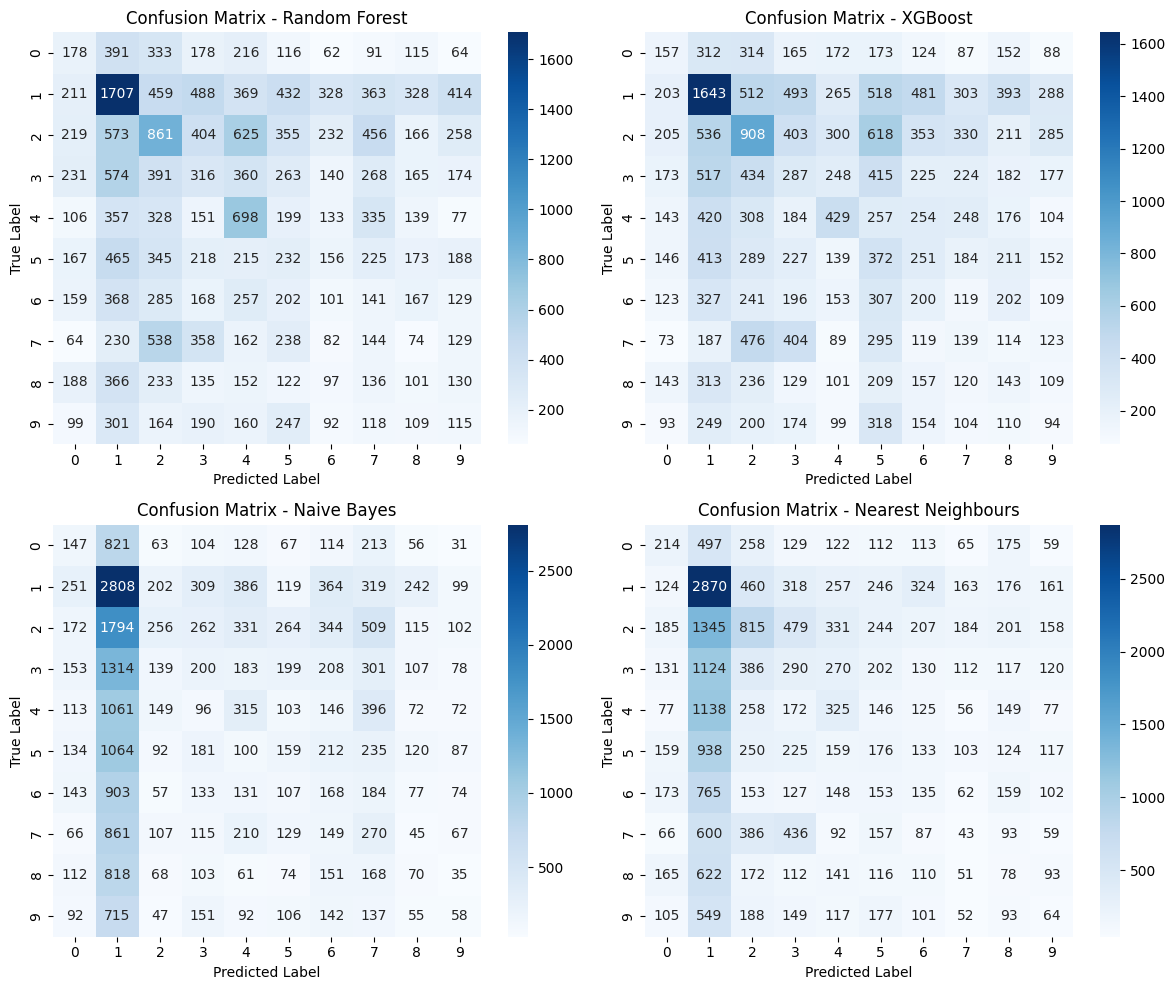

In [ ]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjust based on number of models
axes = axes.ravel()  # Flatten axes array

for i, (name, cm) in enumerate(results_confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

### 4.4. Coding Environment

You are required to provide the specifications of software and hardware (e.g., the version of main packages, the information of CPU/GPU/TPU usage, etc.)  


*   All code was run using Google Colab using an Apple M1 Macbook Air Laptop with 8GB.
*   All code was run using CPU; however for training XGBoost Classifier, T4 GPU was used.




In [3]:
# Get versions of installed packages
import numpy as np
import pandas as pd
import matplotlib
import scipy
import sklearn
import cv2
import seaborn as sns

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("SciPy version:", scipy.__version__)
print("Scikit-Learn version:", sklearn.__version__)
print("OpenCV version:", cv2.__version__)
print("Seaborn version:", sns.__version__)


NumPy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0
SciPy version: 1.14.1
Scikit-Learn version: 1.6.1
OpenCV version: 4.11.0
Seaborn version: 0.13.2


### 4.5 Packages/Code not mentioned in lectures

**Albumentations Code and Documentation**

https://albumentations.ai/docs/api_reference/augmentations/

https://medium.com/@nimritakoul01/image-augmentations-with-albumentations-python-library-part1-823f99a3943a

**Gray Scaling**

https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv/

**Class Weights**

https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

**Confusion Matrices**
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


## 5. Report Guidelines

### Your report should follow this structure:

1. **Introduction**: Introduce the problem that you are attempting to solve, alongside the primary objectives of your project.

2. **Methodology**: This section should delve into the various techniques and algorithms that you implemented throughout your project. Discuss aspects like data preprocessing, the reasoning behind your choice of models, and the approach taken to fine-tune hyperparameters.

3. **Evaluation and Comparison**: Here, you should present and interpret the results from your models. Compare the performance of different algorithms and explain any observed trends or surprising outcomes. Enhance this section by using tables, charts, or other visual aids to effectively illustrate your findings.

4. **Discussion**: This is where you should reflect on and discuss your findings. Consider the following questions: What strategies worked well? Which ones didn't? Were the outcomes as expected or were there any surprises?

5. **Conclusion**: Summarize your work, main findings, limitations, and potential avenues for future work.

6. **Appendix**: In the appendix section, provide clear instructions detailing how to run your code. Also, mention the hardware and software environment you used during your project.

The main report should not exceed 10 pages, excluding the appendix and references. Include your student ID and name in your report as well.

Refer to the rubric on Canvas for comprehensive guidance on each section. This report should serve as a clear, concise, and well-organized representation of your project.